## Data and Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from scikeras.wrappers import KerasClassifier

In [3]:
raw = pd.read_csv("USCensusTraining.csv")
final_test_raw = pd.read_csv("USCensusTest.csv")
raw

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


In [4]:
final_test_raw

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,44,Private,162028,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,44,United-States
1,20,Private,197997,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
2,46,Private,98350,10th,6,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,37,China
3,39,Private,165848,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
4,34,Private,178615,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
7557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
7558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
7559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


## EDA and Data Cleaning

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [6]:
final_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7561 non-null   int64 
 1   workclass       7561 non-null   object
 2   demogweight     7561 non-null   int64 
 3   education       7561 non-null   object
 4   education-num   7561 non-null   int64 
 5   marital-status  7561 non-null   object
 6   occupation      7561 non-null   object
 7   relationship    7561 non-null   object
 8   race            7561 non-null   object
 9   sex             7561 non-null   object
 10  capital-gain    7561 non-null   int64 
 11  capital-loss    7561 non-null   int64 
 12  hours-per-week  7561 non-null   int64 
 13  native-country  7561 non-null   object
dtypes: int64(6), object(8)
memory usage: 827.1+ KB


In [7]:
colnames = raw.columns
for col in colnames:
    print(raw[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 278514 433330 258379]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' '

In [8]:
raw["income"] = raw["income"].map({"<=50K.":0, ">50K.":1})

In [9]:
raw = raw.replace("?", "Missing")
final_test_raw = final_test_raw.replace("?", "Missing")

In [10]:
raw = raw.drop(columns=["education"])
final_test_raw =final_test_raw.drop(columns=["education"])

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education-num   25000 non-null  int64 
 4   marital-status  25000 non-null  object
 5   occupation      25000 non-null  object
 6   relationship    25000 non-null  object
 7   race            25000 non-null  object
 8   sex             25000 non-null  object
 9   capital-gain    25000 non-null  int64 
 10  capital-loss    25000 non-null  int64 
 11  hours-per-week  25000 non-null  int64 
 12  native-country  25000 non-null  object
 13  income          25000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.7+ MB


In [12]:
final_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7561 non-null   int64 
 1   workclass       7561 non-null   object
 2   demogweight     7561 non-null   int64 
 3   education-num   7561 non-null   int64 
 4   marital-status  7561 non-null   object
 5   occupation      7561 non-null   object
 6   relationship    7561 non-null   object
 7   race            7561 non-null   object
 8   sex             7561 non-null   object
 9   capital-gain    7561 non-null   int64 
 10  capital-loss    7561 non-null   int64 
 11  hours-per-week  7561 non-null   int64 
 12  native-country  7561 non-null   object
dtypes: int64(6), object(7)
memory usage: 768.0+ KB


In [13]:
colnames = raw.columns
for col in colnames:
    print(raw[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Missing' 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 278514 433330 258379]
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Missing'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
[ 2174     0 14084  5178  5013  

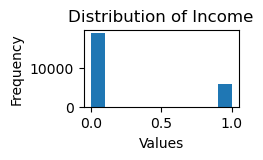

In [14]:
fig, axis = plt.subplots(figsize=(2,1))

plt.hist(raw["income"], bins=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"Distribution of Income")

plt.show()

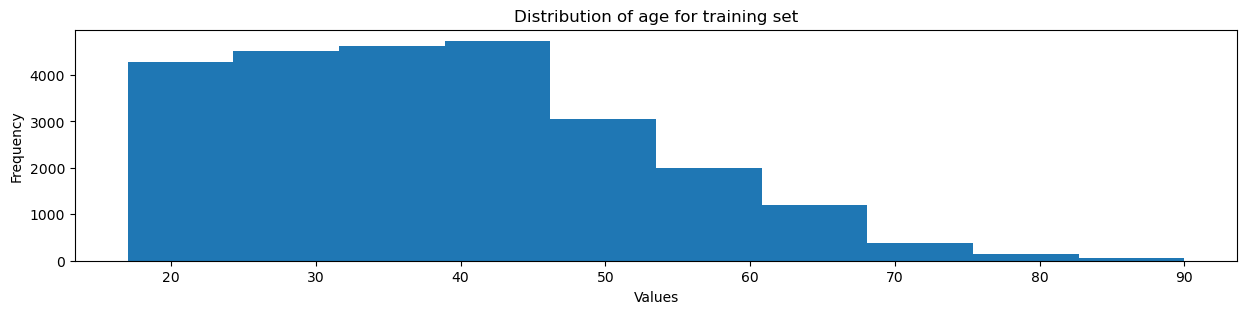

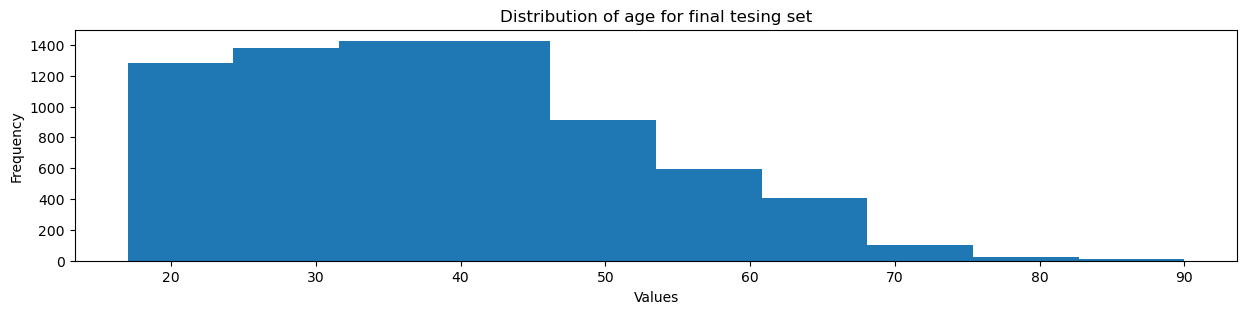

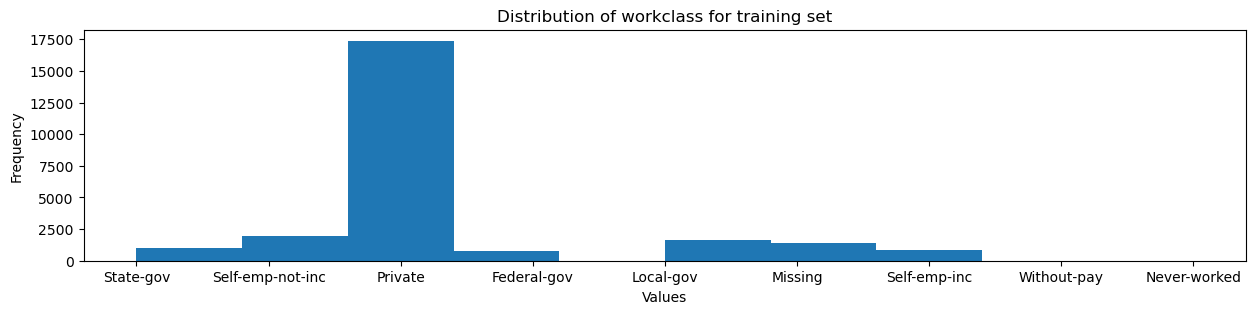

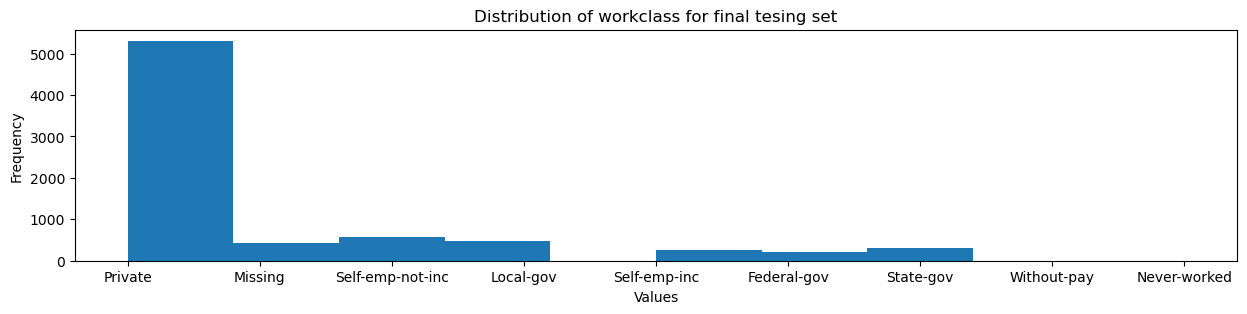

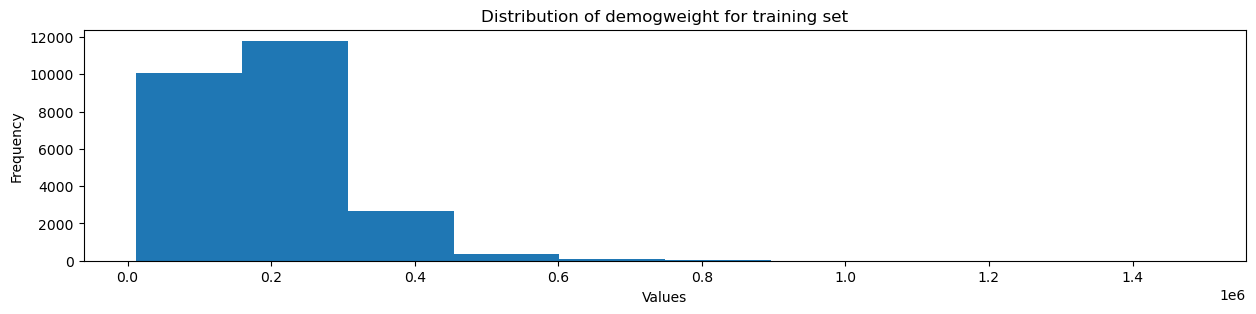

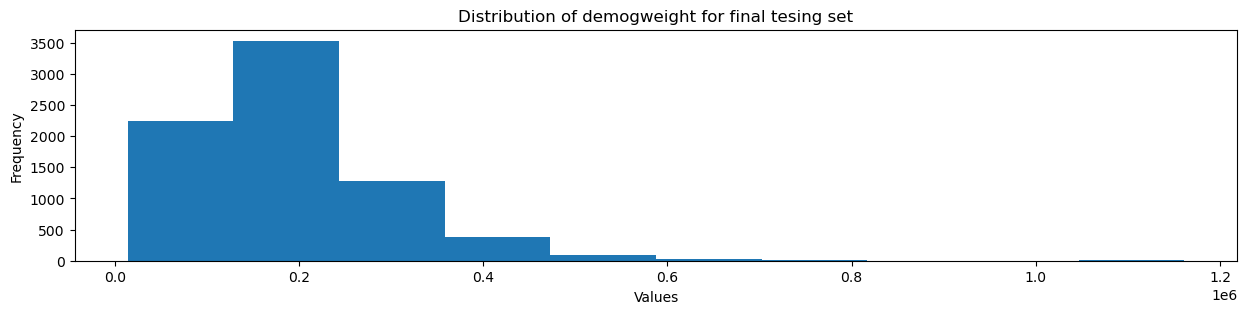

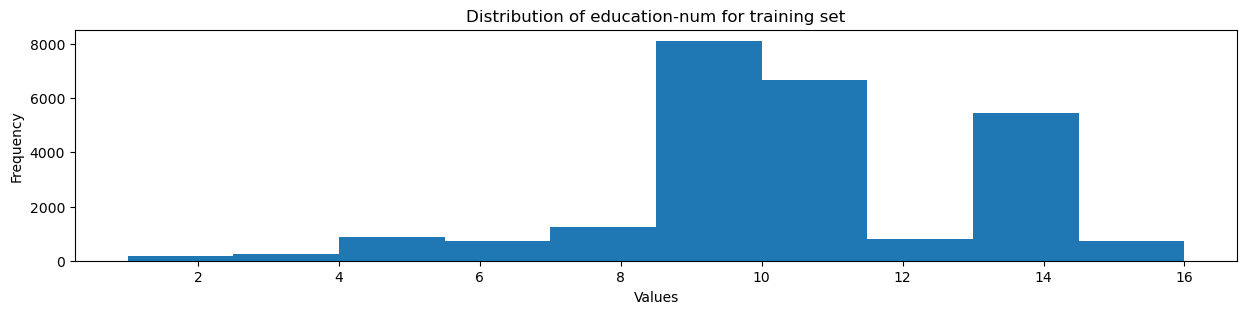

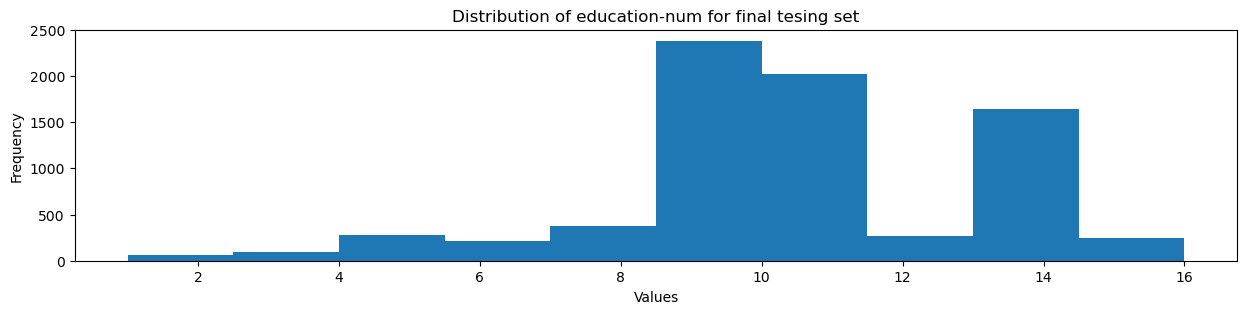

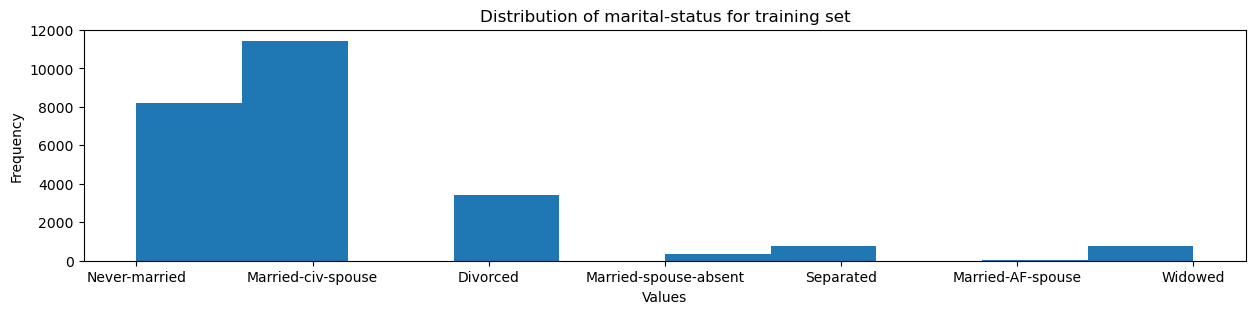

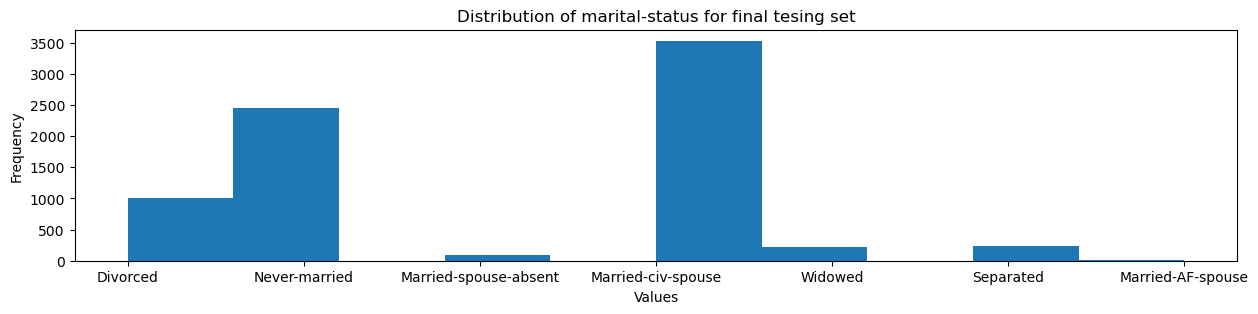

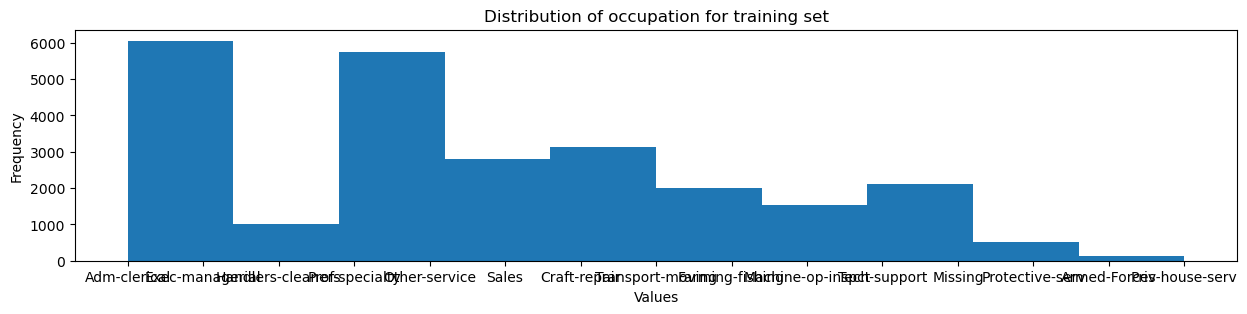

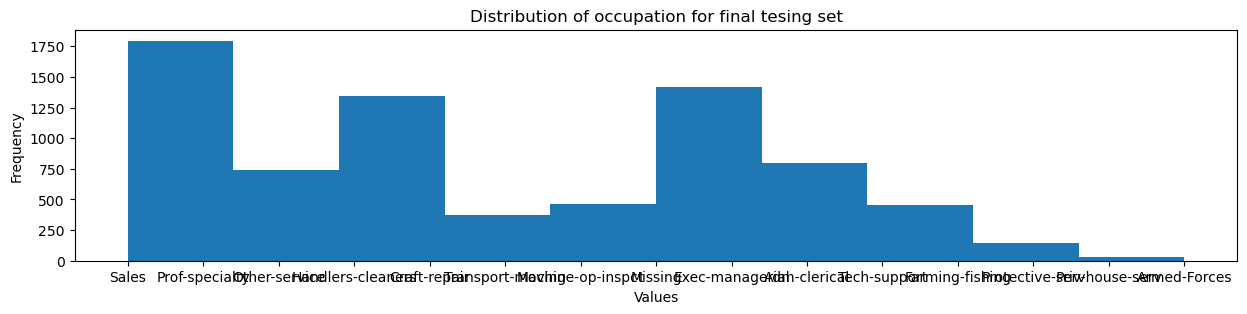

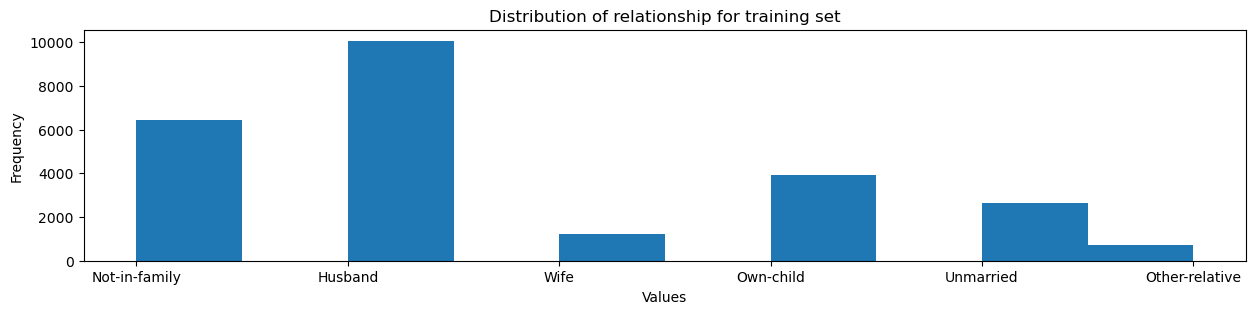

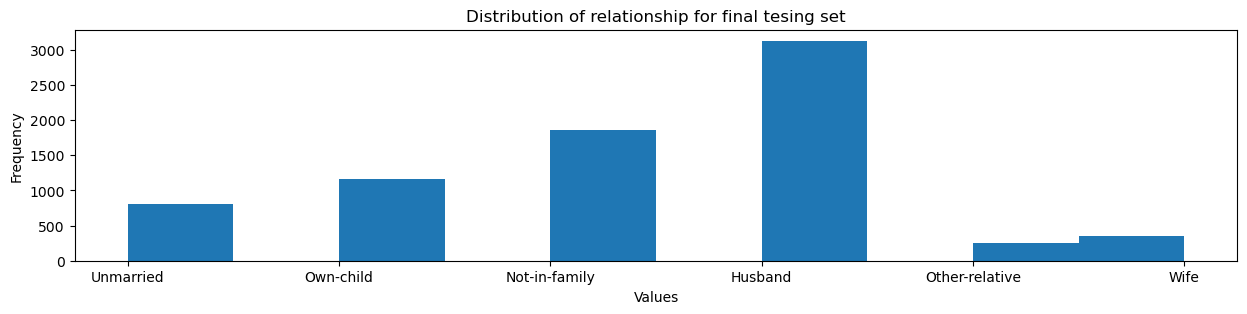

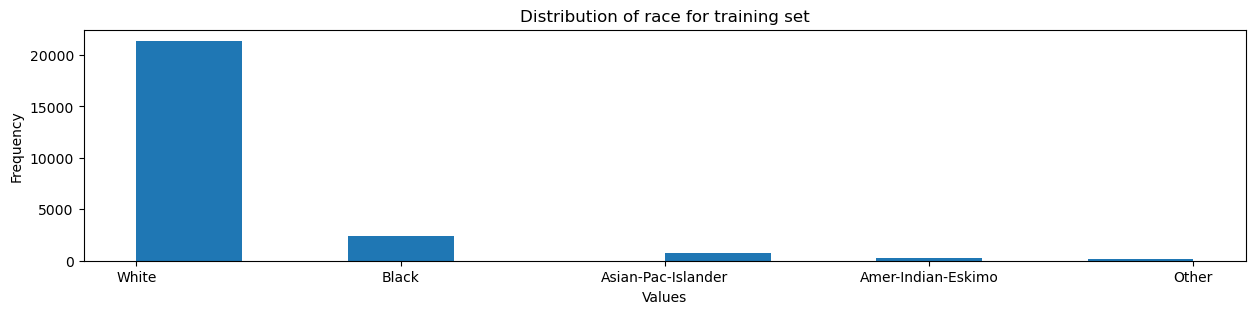

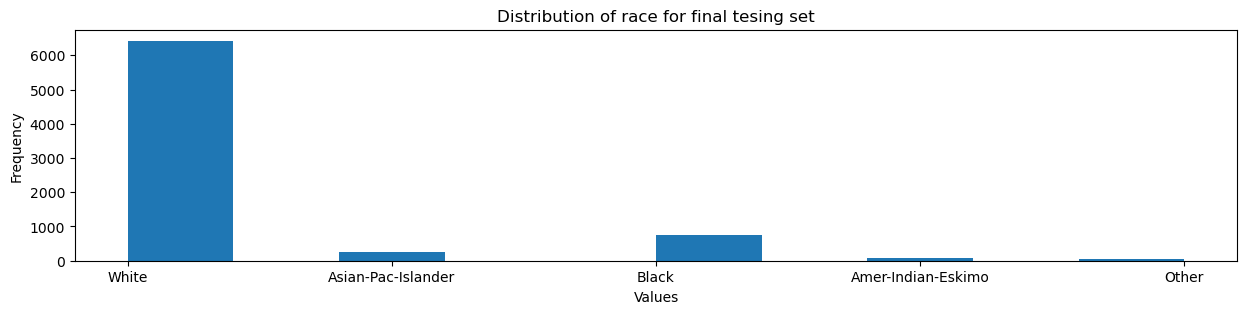

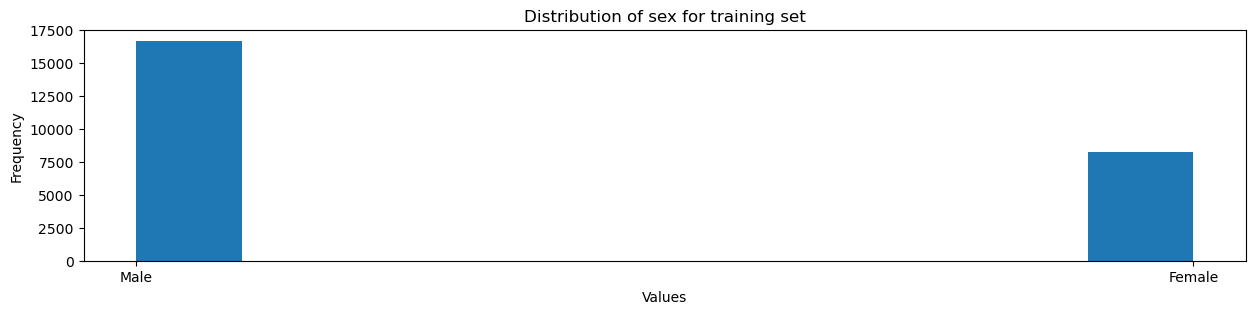

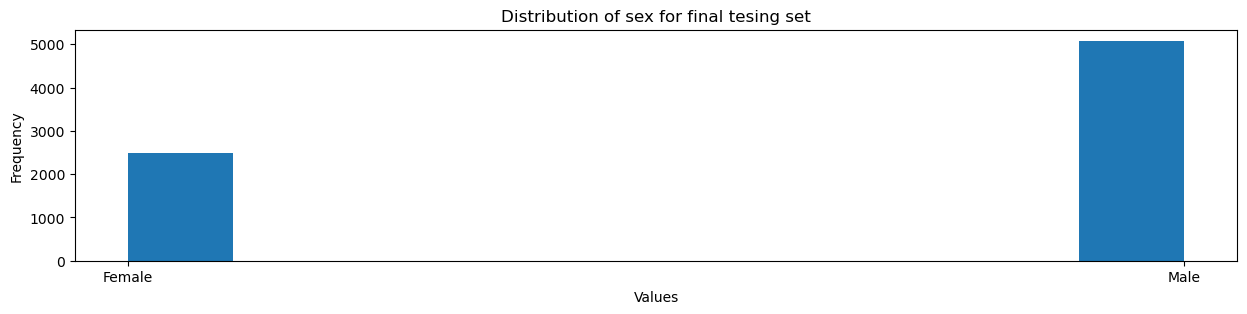

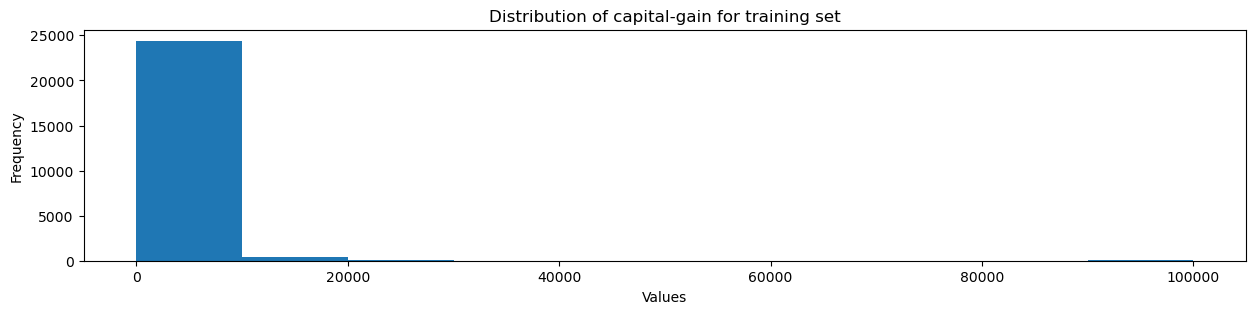

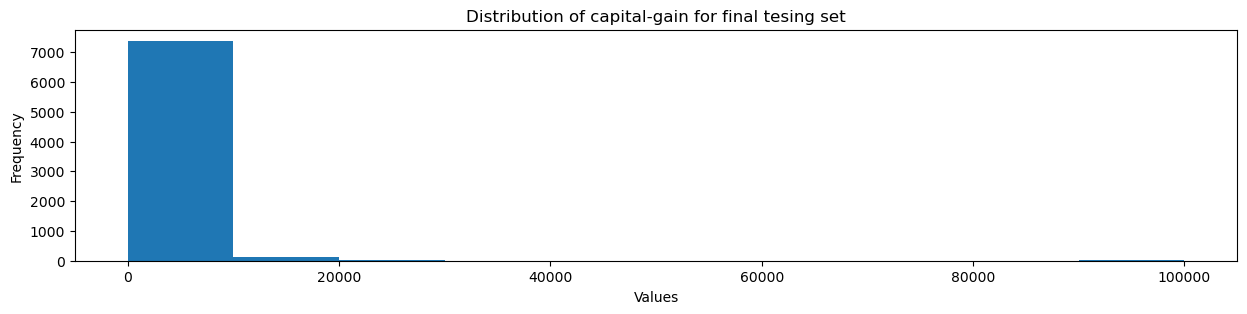

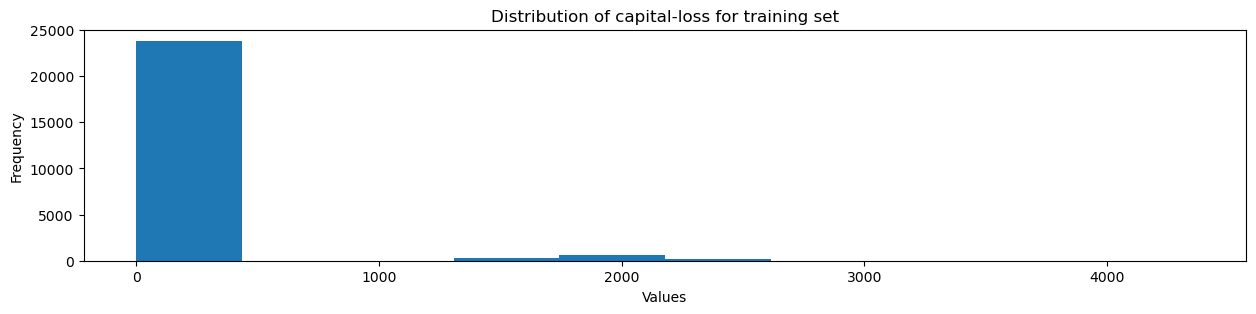

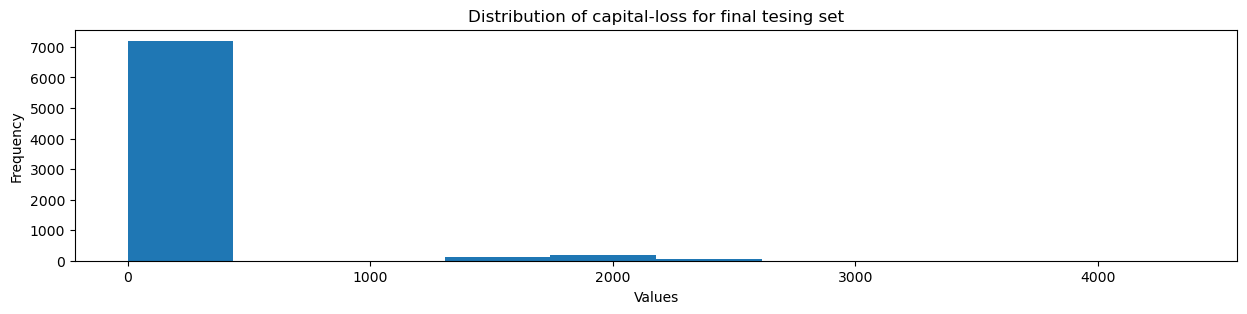

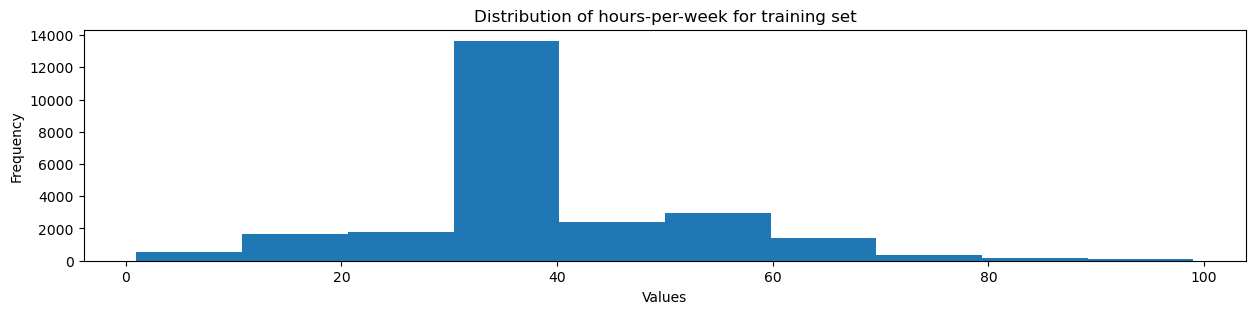

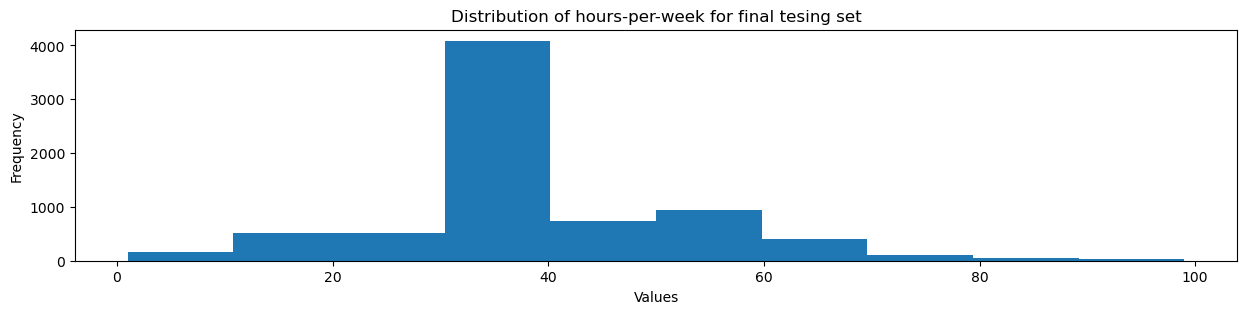

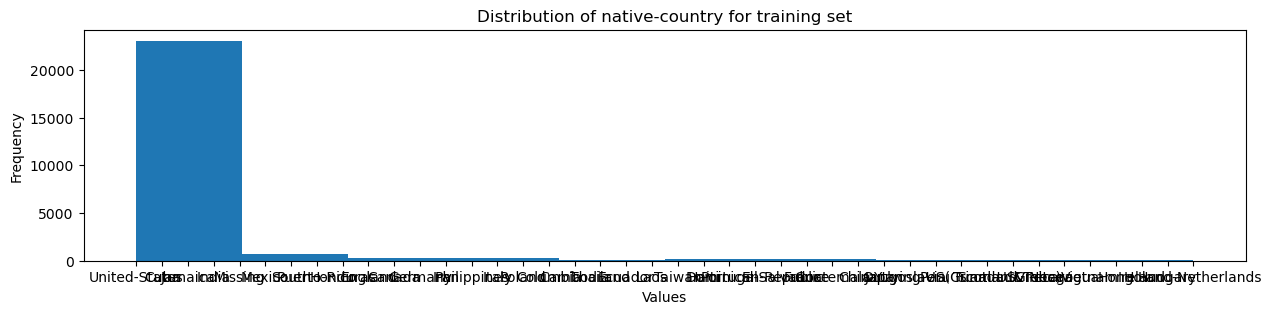

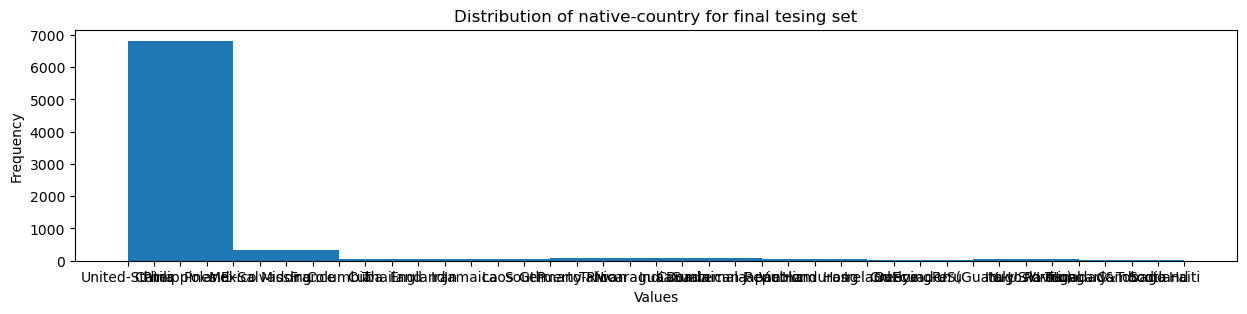

In [15]:
for i, col in enumerate(final_test_raw.columns):
    
    fig, axis = plt.subplots(figsize=(15,3))
    plt.hist(raw[col], bins=10)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col} for training set")
    plt.show()
    
    fig, axis = plt.subplots(figsize=(15,3))
    plt.hist(final_test_raw[col], bins=10)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col} for final tesing set")
    plt.show()

## Preprocessing & Model Building

In [16]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education-num   25000 non-null  int64 
 4   marital-status  25000 non-null  object
 5   occupation      25000 non-null  object
 6   relationship    25000 non-null  object
 7   race            25000 non-null  object
 8   sex             25000 non-null  object
 9   capital-gain    25000 non-null  int64 
 10  capital-loss    25000 non-null  int64 
 11  hours-per-week  25000 non-null  int64 
 12  native-country  25000 non-null  object
 13  income          25000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.7+ MB


In [17]:
# edu_levels = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Prof-school",
#               "Assoc-voc", "Assoc-acdm", "Some-college", "Bachelors", "Masters", "Doctorate"]

In [18]:
# Encode education column to ordinal in training data
# edu_col = raw[["education"]]

# encoder = OrdinalEncoder(categories=[edu_levels], dtype=int)
# edu_encoded = encoder.fit_transform(edu_col)

# raw["education"] = edu_encoded

In [19]:
# Encode education column to ordinal in final test data
# edu_col_test = final_test_raw[["education"]]

# encoder = OrdinalEncoder(categories=[edu_levels], dtype=int)
# edu_encoded_test = encoder.fit_transform(edu_col_test)

# final_test_raw["education"] = edu_encoded_test

In [20]:
# Transform training data categorical columns to dummy columns
categorical_col = ["workclass", "marital-status", "occupation", "relationship", "race", "native-country", "sex"]
raw_dummy = pd.get_dummies(raw, columns=categorical_col).drop(columns=["sex_Male"]).replace({True:1, False:0})
raw_dummy

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,112507,6,0,0,60,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,19,236940,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24997,33,278514,9,0,0,42,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
24998,21,433330,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Transform final test data categorical columns to dummy columns
final_test_dummy = pd.get_dummies(final_test_raw, columns=categorical_col).drop(columns=["sex_Male"]).replace({True:1, False:0})

In [22]:
print(raw_dummy.shape)
print(final_test_dummy.shape)

(25000, 92)
(7561, 90)


In [23]:
for col in raw_dummy.columns:
    if col not in final_test_dummy.columns:
        print(col)

income
native-country_Holand-Netherlands


In [24]:
raw_dummy = raw_dummy.drop(columns=["native-country_Holand-Netherlands"])

In [25]:
X_unscaled = raw_dummy.drop(columns=["income"])
y = raw_dummy["income"]

In [26]:
# Scale training data numeric columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X_unscaled)
X

array([[0.30136986, 0.0443019 , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.0482376 , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.13811345, 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21917808, 0.1808105 , 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.05479452, 0.28595442, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.10958904, 0.16713574, 0.8       , ..., 0.        , 0.        ,
        1.        ]])

In [27]:
# Scale test data numeric columns
final_test_scaled = scaler.fit_transform(final_test_dummy)

In [28]:
print(X.shape)
print(y.shape)
print(final_test_scaled.shape)

(25000, 90)
(25000,)
(7561, 90)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## First model

In [30]:
def create_model():
    
    model = Sequential()
    
    model.add(Dense(6, activation="relu", input_shape=(90,)))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(6, activation="relu"))
    model.add(Dense(1, activation="relu"))
    
    model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
    
    return model

In [31]:
model = KerasClassifier(model=create_model, verbose=2)

In [32]:
batch_size = [300, 500, 800, 1200, 2000, 3000]
epochs = [10, 50, 100, 150, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [33]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [34]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 440ms/epoch - 18ms/step
Epoch 2/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 3/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 16ms/epoch - 625us/step
Epoch 4/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 16ms/epoch - 625us/step
Epoch 5/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 16ms/epoch - 625us/step
Epoch 6/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 35ms/epoch - 1ms/step
Epoch 7/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 8/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 16ms/epoch - 625us/step
Epoch 9/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 10/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 11/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 12/150
25/25 - 0s - loss: 3.6711 - accuracy: 0.7620 - 16ms/epoch - 625us/step
Epoch 13/150


In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.852050 using {'batch_size': 800, 'epochs': 150}


In [36]:
best_model = grid.best_estimator_

In [37]:
test_result = best_model.fit(X_test, y_test)

Epoch 1/150
7/7 - 0s - loss: 0.6592 - accuracy: 0.7100 - 424ms/epoch - 61ms/step
Epoch 2/150
7/7 - 0s - loss: 0.5855 - accuracy: 0.7374 - 16ms/epoch - 2ms/step
Epoch 3/150
7/7 - 0s - loss: 0.5488 - accuracy: 0.7534 - 0s/epoch - 0s/step
Epoch 4/150
7/7 - 0s - loss: 0.5229 - accuracy: 0.7572 - 16ms/epoch - 2ms/step
Epoch 5/150
7/7 - 0s - loss: 0.5007 - accuracy: 0.7610 - 16ms/epoch - 2ms/step
Epoch 6/150
7/7 - 0s - loss: 0.4809 - accuracy: 0.7660 - 0s/epoch - 0s/step
Epoch 7/150
7/7 - 0s - loss: 0.4634 - accuracy: 0.7676 - 16ms/epoch - 2ms/step
Epoch 8/150
7/7 - 0s - loss: 0.4482 - accuracy: 0.7732 - 16ms/epoch - 2ms/step
Epoch 9/150
7/7 - 0s - loss: 0.4350 - accuracy: 0.7828 - 0s/epoch - 0s/step
Epoch 10/150
7/7 - 0s - loss: 0.4245 - accuracy: 0.7864 - 16ms/epoch - 2ms/step
Epoch 11/150
7/7 - 0s - loss: 0.4165 - accuracy: 0.7932 - 16ms/epoch - 2ms/step
Epoch 12/150
7/7 - 0s - loss: 0.4127 - accuracy: 0.7984 - 0s/epoch - 0s/step
Epoch 13/150
7/7 - 0s - loss: 0.4088 - accuracy: 0.7998 - 1

## Second model

In [38]:
def create_model():
    
    model = Sequential()
    
    model.add(Dense(6, activation="relu", input_shape=(90,)))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(6, activation="relu"))
    model.add(Dense(1, activation="relu"))
    
    model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
    
    return model

model2 = KerasClassifier(model=create_model, verbose=2)

In [39]:
batch_size2 = [300, 500, 800, 1200, 2000, 3000]
epochs2 = [10, 50, 100, 150, 200]
param_grid2 = dict(batch_size=batch_size2, epochs=epochs2)

In [40]:
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid2, n_jobs=-1, cv=5)
grid_result2 = grid2.fit(X_train, y_train)

Epoch 1/100
40/40 - 1s - loss: 0.5085 - accuracy: 0.7696 - 519ms/epoch - 13ms/step
Epoch 2/100
40/40 - 0s - loss: 0.4111 - accuracy: 0.8110 - 51ms/epoch - 1ms/step
Epoch 3/100
40/40 - 0s - loss: 0.3860 - accuracy: 0.8212 - 46ms/epoch - 1ms/step
Epoch 4/100
40/40 - 0s - loss: 0.3776 - accuracy: 0.8262 - 31ms/epoch - 781us/step
Epoch 5/100
40/40 - 0s - loss: 0.3709 - accuracy: 0.8285 - 31ms/epoch - 781us/step
Epoch 6/100
40/40 - 0s - loss: 0.3663 - accuracy: 0.8296 - 47ms/epoch - 1ms/step
Epoch 7/100
40/40 - 0s - loss: 0.3613 - accuracy: 0.8320 - 47ms/epoch - 1ms/step
Epoch 8/100
40/40 - 0s - loss: 0.3597 - accuracy: 0.8321 - 53ms/epoch - 1ms/step
Epoch 9/100
40/40 - 0s - loss: 0.3547 - accuracy: 0.8337 - 43ms/epoch - 1ms/step
Epoch 10/100
40/40 - 0s - loss: 0.3503 - accuracy: 0.8349 - 47ms/epoch - 1ms/step
Epoch 11/100
40/40 - 0s - loss: 0.3486 - accuracy: 0.8361 - 31ms/epoch - 781us/step
Epoch 12/100
40/40 - 0s - loss: 0.3459 - accuracy: 0.8372 - 47ms/epoch - 1ms/step
Epoch 13/100
40/4

In [41]:
best_model2 = grid2.best_estimator_
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.852200 using {'batch_size': 500, 'epochs': 100}


In [42]:
test_result2 = best_model2.fit(X_test, y_test)

Epoch 1/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 488ms/epoch - 49ms/step
Epoch 2/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 4/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 5/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 11/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 3.7760 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s

## Third model

In [43]:
def create_model():
    
    model = Sequential()
    
    model.add(Dense(6, activation="sigmoid", input_shape=(90,)))
    model.add(Dense(12, activation="sigmoid"))
    model.add(Dense(6, activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
    
    return model

model3 = KerasClassifier(model=create_model, verbose=2)

In [44]:
batch_size3 = [300, 500, 800, 1200, 2000, 3000]
epochs3 = [10, 50, 100, 150, 200]
param_grid3 = dict(batch_size=batch_size3, epochs=epochs3)

In [45]:
grid3 = GridSearchCV(estimator=model3, param_grid=param_grid3, n_jobs=-1, cv=5)
grid_result3 = grid3.fit(X_train, y_train)

Epoch 1/200
67/67 - 0s - loss: 0.6111 - accuracy: 0.7620 - 467ms/epoch - 7ms/step
Epoch 2/200
67/67 - 0s - loss: 0.5623 - accuracy: 0.7620 - 75ms/epoch - 1ms/step
Epoch 3/200
67/67 - 0s - loss: 0.5488 - accuracy: 0.7620 - 70ms/epoch - 1ms/step
Epoch 4/200
67/67 - 0s - loss: 0.5479 - accuracy: 0.7620 - 59ms/epoch - 885us/step
Epoch 5/200
67/67 - 0s - loss: 0.5470 - accuracy: 0.7620 - 62ms/epoch - 922us/step
Epoch 6/200
67/67 - 0s - loss: 0.5453 - accuracy: 0.7620 - 67ms/epoch - 996us/step
Epoch 7/200
67/67 - 0s - loss: 0.5423 - accuracy: 0.7620 - 56ms/epoch - 841us/step
Epoch 8/200
67/67 - 0s - loss: 0.5368 - accuracy: 0.7620 - 76ms/epoch - 1ms/step
Epoch 9/200
67/67 - 0s - loss: 0.5271 - accuracy: 0.7620 - 63ms/epoch - 945us/step
Epoch 10/200
67/67 - 0s - loss: 0.5124 - accuracy: 0.7620 - 63ms/epoch - 934us/step
Epoch 11/200
67/67 - 0s - loss: 0.4930 - accuracy: 0.7620 - 67ms/epoch - 1ms/step
Epoch 12/200
67/67 - 0s - loss: 0.4708 - accuracy: 0.7620 - 66ms/epoch - 978us/step
Epoch 13/2

In [46]:
best_model3 = grid3.best_estimator_
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.852850 using {'batch_size': 300, 'epochs': 200}


In [47]:
test_result3 = best_model3.fit(X_test, y_test)

Epoch 1/200
17/17 - 0s - loss: 0.5655 - accuracy: 0.7552 - 406ms/epoch - 24ms/step
Epoch 2/200
17/17 - 0s - loss: 0.5568 - accuracy: 0.7552 - 33ms/epoch - 2ms/step
Epoch 3/200
17/17 - 0s - loss: 0.5541 - accuracy: 0.7552 - 24ms/epoch - 1ms/step
Epoch 4/200
17/17 - 0s - loss: 0.5527 - accuracy: 0.7552 - 22ms/epoch - 1ms/step
Epoch 5/200
17/17 - 0s - loss: 0.5517 - accuracy: 0.7552 - 17ms/epoch - 1ms/step
Epoch 6/200
17/17 - 0s - loss: 0.5506 - accuracy: 0.7552 - 22ms/epoch - 1ms/step
Epoch 7/200
17/17 - 0s - loss: 0.5492 - accuracy: 0.7552 - 19ms/epoch - 1ms/step
Epoch 8/200
17/17 - 0s - loss: 0.5476 - accuracy: 0.7552 - 22ms/epoch - 1ms/step
Epoch 9/200
17/17 - 0s - loss: 0.5457 - accuracy: 0.7552 - 21ms/epoch - 1ms/step
Epoch 10/200
17/17 - 0s - loss: 0.5437 - accuracy: 0.7552 - 20ms/epoch - 1ms/step
Epoch 11/200
17/17 - 0s - loss: 0.5411 - accuracy: 0.7552 - 21ms/epoch - 1ms/step
Epoch 12/200
17/17 - 0s - loss: 0.5384 - accuracy: 0.7552 - 20ms/epoch - 1ms/step
Epoch 13/200
17/17 - 0s

## Forth model (selecting optimizer based on the second model)

In [48]:
def create_model(optimizer="Adam"):
    
    model = Sequential()
    
    model.add(Dense(6, activation="relu", input_shape=(90,)))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(6, activation="relu"))
    model.add(Dense(1, activation="relu"))
    
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return model

model4 = KerasClassifier(model=create_model, epochs=200, batch_size=800, verbose=2)

In [49]:
optimizer4 = ["SGD", "RMSprop", "Adam"]
param_grid4 = dict(optimizer=optimizer4)

In [50]:
grid4 = GridSearchCV(estimator=model4, param_grid=param_grid4, n_jobs=-1, cv=5)
grid_result4 = grid4.fit(X_train, y_train)

Epoch 1/200
25/25 - 1s - loss: 3.6706 - accuracy: 0.7620 - 573ms/epoch - 23ms/step
Epoch 2/200
25/25 - 0s - loss: 3.6707 - accuracy: 0.7620 - 47ms/epoch - 2ms/step
Epoch 3/200
25/25 - 0s - loss: 3.6276 - accuracy: 0.7620 - 45ms/epoch - 2ms/step
Epoch 4/200
25/25 - 0s - loss: 1.9387 - accuracy: 0.7620 - 33ms/epoch - 1ms/step
Epoch 5/200
25/25 - 0s - loss: 0.6384 - accuracy: 0.7620 - 29ms/epoch - 1ms/step
Epoch 6/200
25/25 - 0s - loss: 0.5044 - accuracy: 0.7620 - 31ms/epoch - 1ms/step
Epoch 7/200
25/25 - 0s - loss: 0.4589 - accuracy: 0.7740 - 29ms/epoch - 1ms/step
Epoch 8/200
25/25 - 0s - loss: 0.4353 - accuracy: 0.7886 - 28ms/epoch - 1ms/step
Epoch 9/200
25/25 - 0s - loss: 0.4204 - accuracy: 0.7963 - 29ms/epoch - 1ms/step
Epoch 10/200
25/25 - 0s - loss: 0.4085 - accuracy: 0.8033 - 29ms/epoch - 1ms/step
Epoch 11/200
25/25 - 0s - loss: 0.3998 - accuracy: 0.8104 - 31ms/epoch - 1ms/step
Epoch 12/200
25/25 - 0s - loss: 0.3936 - accuracy: 0.8168 - 33ms/epoch - 1ms/step
Epoch 13/200
25/25 - 0s

In [51]:
best_model4 = grid4.best_estimator_
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

Best: 0.849750 using {'optimizer': 'SGD'}


In [52]:
test_result4 = best_model4.fit(X_test, y_test)

Epoch 1/200
7/7 - 1s - loss: 1.2375 - accuracy: 0.7552 - 558ms/epoch - 80ms/step
Epoch 2/200
7/7 - 0s - loss: 0.7562 - accuracy: 0.7552 - 12ms/epoch - 2ms/step
Epoch 3/200
7/7 - 0s - loss: 0.6527 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 4/200
7/7 - 0s - loss: 0.6212 - accuracy: 0.7552 - 12ms/epoch - 2ms/step
Epoch 5/200
7/7 - 0s - loss: 0.5981 - accuracy: 0.7552 - 12ms/epoch - 2ms/step
Epoch 6/200
7/7 - 0s - loss: 0.5818 - accuracy: 0.7552 - 10ms/epoch - 1ms/step
Epoch 7/200
7/7 - 0s - loss: 0.5707 - accuracy: 0.7552 - 12ms/epoch - 2ms/step
Epoch 8/200
7/7 - 0s - loss: 0.5615 - accuracy: 0.7552 - 16ms/epoch - 2ms/step
Epoch 9/200
7/7 - 0s - loss: 0.5534 - accuracy: 0.7552 - 15ms/epoch - 2ms/step
Epoch 10/200
7/7 - 0s - loss: 0.5455 - accuracy: 0.7556 - 14ms/epoch - 2ms/step
Epoch 11/200
7/7 - 0s - loss: 0.5379 - accuracy: 0.7556 - 13ms/epoch - 2ms/step
Epoch 12/200
7/7 - 0s - loss: 0.5303 - accuracy: 0.7558 - 12ms/epoch - 2ms/step
Epoch 13/200
7/7 - 0s - loss: 0.5228 - accuracy

## best_model4 got the highest scores

In [53]:
final_pred_results = best_model4.predict(final_test_scaled)
final_pred_results

10/10 - 0s - 70ms/epoch - 7ms/step


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
sum(final_pred_results)

1658

In [55]:
final_results_df = pd.DataFrame(final_pred_results)

In [56]:
final_results_df.to_csv("Team14predictions", index=False)

## Sensitivity Test

In [57]:
X_test.shape

(5000, 90)

In [58]:
X_mean = np.mean(X_test, axis=0)
X_mean.shape

(90,)

In [59]:
output_mean = best_model4.predict([X_mean])[0]
output_mean

1/1 - 0s - 9ms/epoch - 9ms/step


0

In [60]:
sensitivity_mean =  []

for i, attribute in enumerate(X_mean):
    min_val = np.min(X_test[:, i])
    max_val = np.max(X_test[:, i])
    varied_val = np.linspace(min_val, max_val, num=10)
    
    output_diff_list = []
    for val in varied_val:
        Xmean_copy = X_mean
        Xmean_copy[i] = val
        pred_result = best_model4.predict([Xmean_copy])[0]
        output_diff = np.abs(pred_result - output_mean)
        output_diff_list.append(output_diff)
    
    diff_mean = np.mean(output_diff_list)
    sensitivity_mean.append(diff_mean)

1/1 - 0s - 6ms/epoch - 6ms/step
1/1 - 0s - 5ms/epoch - 5ms/step
1/1 - 0s - 4ms/epoch - 4ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 2ms/epoch - 2ms/step
1/1 - 0s - 5ms/epoch - 5ms/step
1/1 - 0s - 4ms/epoch - 4ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 9ms/epoch - 9ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 6ms/epoch - 6ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 9ms/epoch - 9ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 9ms/epoch - 9ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step


In [61]:
sensitivity_col = X_unscaled.columns.tolist()
sensitivity_df = pd.DataFrame({"attribute":sensitivity_col,"sensitivity":sensitivity_mean})
sensitivity_df

,attribute,sensitivity
0,age,0.0
1,demogweight,0.8
2,education-num,0.8
3,capital-gain,1.0
4,capital-loss,1.0
...,...,...
85,native-country_Trinadad&Tobago,0.0
86,native-country_United-States,0.0
87,native-country_Vietnam,0.0
88,native-country_Yugoslavia,0.0


In [62]:
sensitivity_rank = alt.Chart(sensitivity_df).mark_bar().encode(
    alt.X("sensitivity"),
    alt.Y("attribute", sort="-x")
)
sensitivity_rank

alt.Chart(...)

## Confusion Matrix

7/7 - 0s - 14ms/epoch - 2ms/step


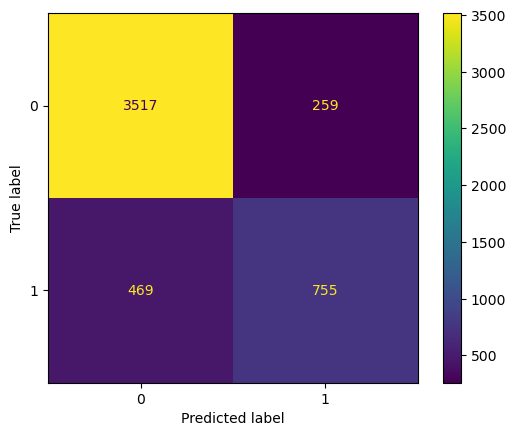

In [63]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

estimates = best_model4.predict(X_test)
cm = confusion_matrix(y_test, estimates, labels=best_model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model4.classes_)
disp.plot()
plt.show()

In [64]:
test_result = pd.DataFrame(X_test, columns=X_unscaled.columns)
test_result['income'] = y_test
test_result['pred_income'] = estimates

test_result

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,income,pred_income
0,0.205479,0.078599,0.533333,0.0,0.000000,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
1,0.027397,0.381675,0.533333,0.0,0.000000,0.275510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0
2,0.191781,0.251343,0.400000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0
3,0.397260,0.102064,0.866667,0.0,0.000000,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0
4,0.000000,0.216831,0.466667,0.0,0.000000,0.295918,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.068493,0.076510,0.600000,0.0,0.000000,0.438776,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
4996,0.342466,0.123332,0.600000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1
4997,0.041096,0.090757,0.600000,0.0,0.000000,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
4998,0.301370,0.228356,0.600000,0.0,0.554408,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1


In [65]:
# List the columns that are dummy variables for occupation
dummy_columns = [col for col in test_result.columns if 'occupation_' in col]

# Convert dummy columns to a single categorical column
test_result['Occupation'] = test_result[dummy_columns].idxmax(axis=1)

test_result['Occupation'] = test_result['Occupation'].str.replace('occupation_', '')
test_result

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,workclass_Never-worked,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,income,pred_income,Occupation
0,0.205479,0.078599,0.533333,0.0,0.000000,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,Other-service
1,0.027397,0.381675,0.533333,0.0,0.000000,0.275510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0,Handlers-cleaners
2,0.191781,0.251343,0.400000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0,Craft-repair
3,0.397260,0.102064,0.866667,0.0,0.000000,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0,Prof-specialty
4,0.000000,0.216831,0.466667,0.0,0.000000,0.295918,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,Adm-clerical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.068493,0.076510,0.600000,0.0,0.000000,0.438776,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,Adm-clerical
4996,0.342466,0.123332,0.600000,0.0,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1,Prof-specialty
4997,0.041096,0.090757,0.600000,0.0,0.000000,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,Adm-clerical
4998,0.301370,0.228356,0.600000,0.0,0.554408,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1,Farming-fishing


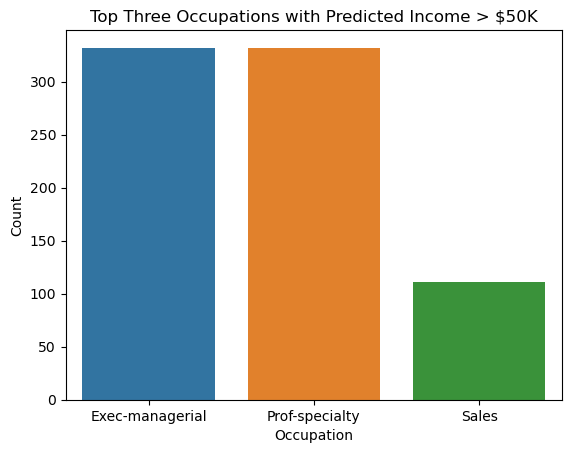

In [67]:
import seaborn as sns
high_income_df = test_result[test_result['pred_income'] == 1]

# Find the top three occupations
top_occupations = high_income_df['Occupation'].value_counts().head(3)

# Create a bar plot for the top three occupations
sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.title('Top Three Occupations with Predicted Income > $50K')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.show()

Text(0, 0.5, 'Count')

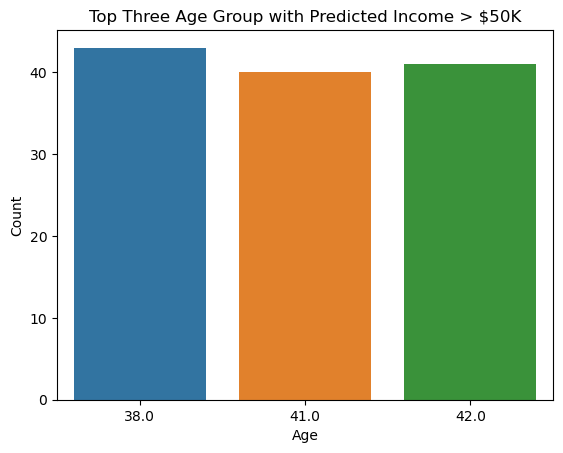

In [68]:
def reverse_min_max_scaling(scaled_data, min_val, max_val):
    return (scaled_data * (max_val - min_val)) + min_val

scaled_data = high_income_df['age']
original_min = min(X_unscaled['age'])
original_max = max(X_unscaled['age'])

# Reverse the scaling
unscaled_data = reverse_min_max_scaling(scaled_data, original_min, original_max)

# Graph for Age Distribution
top_occupations = unscaled_data.value_counts().head(3)

sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.title('Top Three Age Group with Predicted Income > $50K')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 0, 'Education Level')

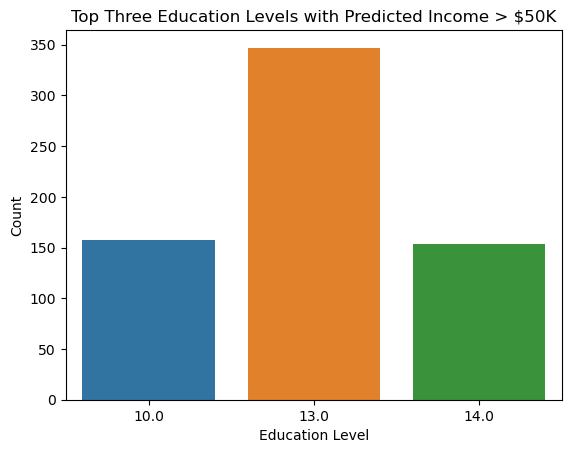

In [69]:
scaled_data = high_income_df['education-num']
original_min = min(X_unscaled['education-num'])
original_max = max(X_unscaled['education-num']) 

# Reverse the scaling
unscaled_data = reverse_min_max_scaling(scaled_data, original_min, original_max)

# Graph for Top Education Levels
top_occupations = unscaled_data.value_counts().head(3)

sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.title('Top Three Education Levels with Predicted Income > $50K')
plt.ylabel('Count')
plt.xlabel('Education Level')

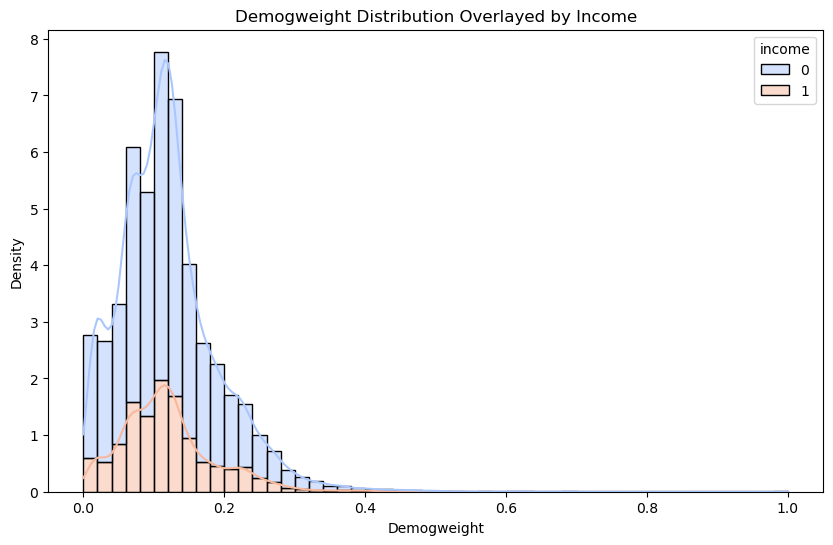

In [70]:
plt.figure(figsize=(10, 6))

raw[['demogweight']] = scaler.fit_transform(raw[['demogweight']])

sns.histplot(data=raw, x='demogweight', bins=50, hue='income', multiple='stack', palette='coolwarm', kde=True, stat='density')
plt.title('Demogweight Distribution Overlayed by Income')
plt.xlabel('Demogweight')
plt.ylabel('Density')
plt.show()

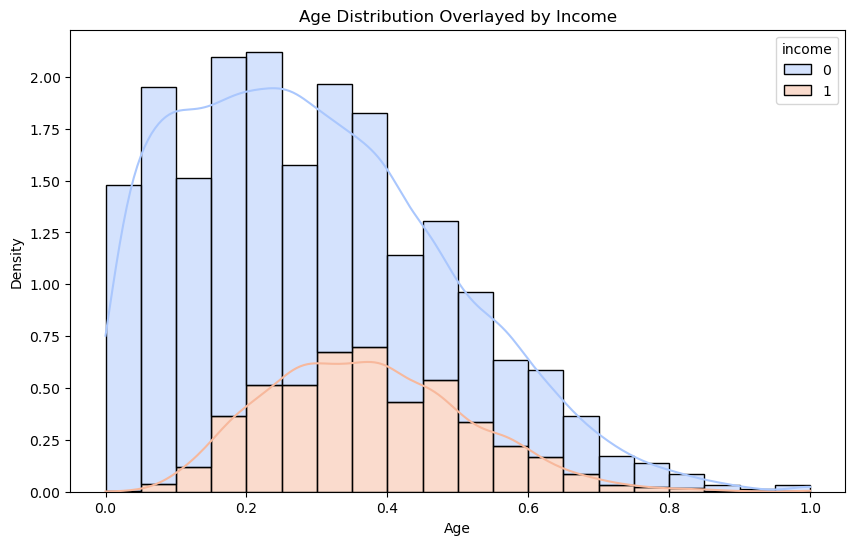

In [71]:
plt.figure(figsize=(10, 6))

raw[['age']] = scaler.fit_transform(raw[['age']])

sns.histplot(data=raw, x='age', bins=20, hue='income', multiple='stack', palette='coolwarm', kde=True, stat='density')
plt.title('Age Distribution Overlayed by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()